# Analysis and prediction on likelihood of spending more money for healthy foods using the young-people-survey dataset

## Setup: Importing common modules and machine learning libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import math
from collections import Counter, OrderedDict
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display
import copy
import warnings
warnings.filterwarnings("ignore")
from __future__ import print_function

# import of machine learning libraries
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, r2_score, classification_report
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier as RFR
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
from sklearn.svm import SVC, LinearSVC

### Reading and loading data in pandas dataframe

In [2]:
def read_data(file_path):
    return pd.read_csv(file_path)

In [3]:
file_path = 'young-people-survey/responses.csv'
yps_data = read_data(file_path)

## Data analysis of the young-people-survey dataset with respect to spending habbits and health concerns

In [4]:
var_of_interest = 'Spending on healthy eating'
yps_data.head(2)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats


In [5]:
yps_data.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,1000.000000,1004.000000,1001.000000,1005.000000,1005.000000,1009.000000,1006.000000,1004.000000,1007.000000,1003.000000,1007.000000,1009.000000,1004.000000,995.000000,1006.000000,1003.000000,1008.000000,1008.000000,1004.000000,1002.000000,1006.000000,1007.000000,1006.00000,1007.000000,1009.000000,1008.000000,1007.000000,1005.000000,1010.000000,1007.000000,1009.000000,1009.000000,1009.000000,1007.000000,1003.000000,1005.000000,1007.000000,1005.000000,1007.000000,1003.000000,1006.000000,1009.000000,1006.000000,1004.000000,1006.000000,1009.000000,1003.000000,1006.000000,1007.000000,1005.000000,1006.000000,1006.000000,1005.000000,1010.000000,1004.000000,1003.000000,1008.000000,1009.000000,1006.000000,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,2.165000,3.159363,3.082917,3.778109,2.516418,2.256690,2.686879,2.589641,2.273088,3.686939,2.461768,2.324083,1.901394,3.387940,3.291252,1.907278,2.362103,3.276786,3.234064,3.024950,4.557654,2.948361,3.33499,2.061569

### Mean for the feature 'Spending on healthy eating' is 3.55 which is bit more than average.

### Check for missing values in the data

In [6]:
def check_null_values_in_data():
    null_fields = yps_data.isnull().sum().sort_values(ascending=False)
    print("Plot of null values for all the features in the data set.")
    null_fields.plot(kind='bar', figsize = (25,5))
    plt.show()

Plot of null values for all the features in the data set.


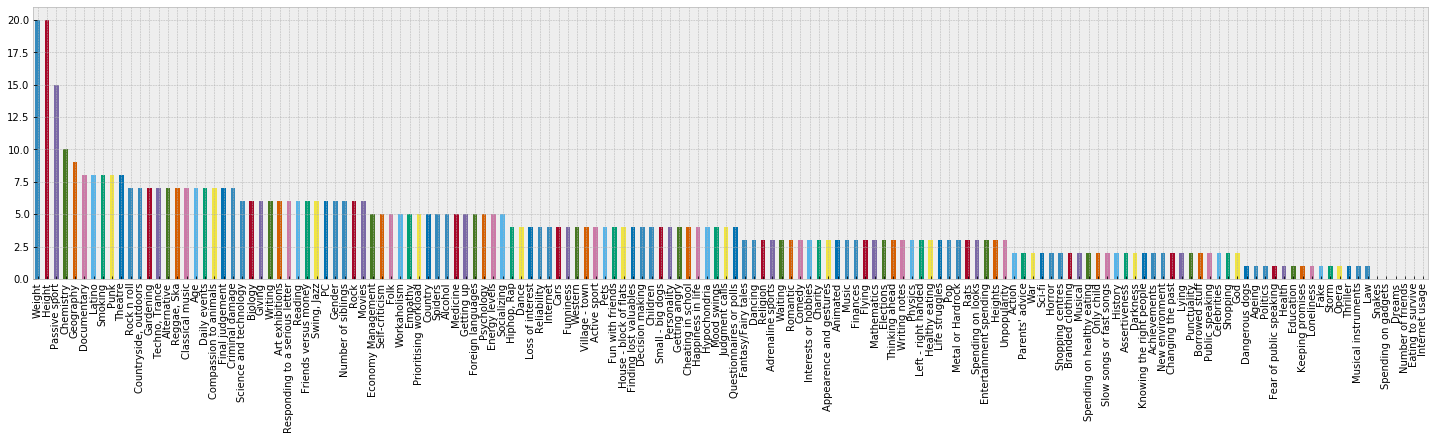

In [7]:
check_null_values_in_data()

## Data Preprocessing

### Drop rows with nulls in target feature 'Spending on healthy eating'

In [8]:
yps_data.dropna(subset=[var_of_interest], inplace=True)

### Discritization of continuous values

In [9]:
def binning():
    
    labels = [1.0, 2.0, 3.0, 4.0, 5.0]

    weight_bins = [0, 54, 60, 68, 79, 300]
    yps_data['Weight'] = pd.cut(yps_data['Weight'], bins=weight_bins, labels=labels)
    yps_data['Weight'].fillna(3.0, inplace=True)

    height_bins = [0, 165, 170, 176, 184, 300]
    yps_data['Height'] = pd.cut(yps_data['Height'], bins=height_bins, labels=labels)
    yps_data['Height'].fillna(3.0, inplace=True)

    age_bins = [0, 18, 19, 20, 22, 40]
    yps_data['Age'] = pd.cut(yps_data['Age'], bins=age_bins, labels=labels)
    yps_data['Age'].fillna(3.0, inplace=True)

    number_of_siblings_bins = [-1, 0, 1, 2, 3, 15]
    yps_data['Number of siblings'] = pd.cut(yps_data['Number of siblings'], bins=number_of_siblings_bins, labels=labels)
    yps_data['Number of siblings'].fillna(3.0, inplace=True)
    #return yps_data

In [10]:
binning()

### Preprocessing of categorical data

#### Find unique values of all categorical features

In [11]:
def find_unique_values():

    unique_cat_vals = {'Gender': yps_data['Gender'].unique(),
                      'Left - right handed': yps_data['Left - right handed'].unique(),
                      'Education': yps_data['Education'].unique(),
                        'Only child': yps_data['Only child'].unique(),
                       'Village - town': yps_data['Village - town'].unique(),
                       'House - block of flats': yps_data['House - block of flats'].unique(),
                       'Smoking': yps_data['Smoking'].unique(),
                       'Alcohol': yps_data['Alcohol'].unique(),
                       'Punctuality': yps_data['Punctuality'].unique(),
                       'Lying': yps_data['Lying'].unique(),
                       'Internet usage': yps_data['Internet usage'].unique()}
    return unique_cat_vals

In [12]:
find_unique_values()

{'Gender': array(['female', 'male', nan], dtype=object),
 'Left - right handed': array(['right handed', 'left handed', nan], dtype=object),
 'Education': array(['college/bachelor degree', 'secondary school', 'primary school',
        'masters degree', 'doctorate degree',
        'currently a primary school pupil', nan], dtype=object),
 'Only child': array(['no', 'yes', nan], dtype=object),
 'Village - town': array(['village', 'city', nan], dtype=object),
 'House - block of flats': array(['block of flats', 'house/bungalow', nan], dtype=object),
 'Smoking': array(['never smoked', 'tried smoking', 'former smoker', 'current smoker',
        nan], dtype=object),
 'Alcohol': array(['drink a lot', 'social drinker', 'never', nan], dtype=object),
 'Punctuality': array(['i am always on time', 'i am often early',
        'i am often running late', nan], dtype=object),
 'Lying': array(['never', 'sometimes', 'only to avoid hurting someone',
        'everytime it suits me', nan], dtype=object),
 'In

#### Convert unique text values to numbers for categorical data

In [13]:
def categorical_data_processing():
    
    yps_data['Gender'] = yps_data['Gender'].map({'male': 1, 'female': 2})
    yps_data['Left - right handed'] = yps_data['Left - right handed'].map({'right handed': 1, 'left handed': 2})
    yps_data['Education'] = yps_data['Education'].map({'currently a primary school pupil': 1.0, 'primary school': 2.0, 'secondary school':3.0, 'college/bachelor degree': 4.0, 'masters degree': 5.0, 'doctorate degree': 6.0})
    yps_data['Only child'] = yps_data['Only child'].map({'no': 1, 'yes': 2})
    yps_data['Village - town'] = yps_data['Village - town'].map({'village': 1, 'city': 2})
    yps_data['House - block of flats'] = yps_data['House - block of flats'].map({'block of flats': 1, 'house/bungalow': 2})
    yps_data['Smoking'] = yps_data['Smoking'].map({'never smoked': 1.0,'tried smoking': 2.0, 'former smoker': 3.0, 'current smoker': 4.0})
    yps_data['Alcohol'] = yps_data['Alcohol'].map({'never': 1.0, 'social drinker': 2.0, 'drink a lot': 3.0})
    yps_data['Punctuality'] = yps_data['Punctuality'].map({'i am often early': 1.0, 'i am always on time': 2.0, 'i am often running late': 3.0})
    yps_data['Lying'] = yps_data['Lying'].map({'never': 1.0, 'only to avoid hurting someone': 2.0, 'sometimes': 3.0, 'everytime it suits me': 4.0})
    yps_data['Internet usage'] = yps_data['Internet usage'].map({'no time at all': 1.0, 'less than an hour a day': 2.0, 'few hours a day': 3.0, 'most of the day': 4.0})


In [14]:
categorical_data_processing()

###  Replace nan with its numpy quivalent and impute all NaN with most frequent value for that particular feature in the data

In [15]:
yps_data = yps_data.replace("nan", np.nan)
yps_data = yps_data.replace("NaN", np.nan)

imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imp.fit(yps_data)
yps_data_imputed = imp.transform(yps_data)
yps_data = pd.DataFrame(data=yps_data_imputed[:,:], index=[i for i in range(len(yps_data_imputed))],
                     columns=yps_data.columns.tolist())

## Correlation

### Find correlation of all features with target feature

In [16]:
def plot_correlation(x, y, figsize):
    fig, ax = plt.subplots(figsize= figsize)
    ax.set_title("Features")
    sns.barplot(x=x, y=y,  ax = ax)
    ax.set_ylabel("Correlation coefficients")
    plt.show()

    
def find_correlation(var_of_interest, yps_data):
    
    df = copy.deepcopy(yps_data)
    
    cols = [col for col in df.columns]
    cols.remove(var_of_interest)
    lbls, vals = [], []
    for col in cols:
        lbls.append(col)
        vals.append(np.corrcoef(df[col], df[var_of_interest])[0,1])
    correlations = pd.DataFrame({'features': lbls, 'corr_values': vals})
    correlations = correlations.sort_values(by='corr_values')
    print("")
    print("Features and their correlation values with target feature:")
    print(correlations)
    print("")
    return correlations    

In [17]:
corrs = find_correlation(var_of_interest, yps_data)


Features and their correlation values with target feature:
     corr_values                        features
95     -0.127169               Eating to survive
102    -0.109542               Changing the past
108    -0.092819                           Lying
111    -0.091330                     Mood swings
142    -0.084730              Number of siblings
128    -0.080785                      Getting up
87     -0.066808                            Fake
74     -0.061459                         Alcohol
103    -0.051770                             God
72     -0.046912         Fear of public speaking
89     -0.045809                 Decision making
120    -0.036764                 Public speaking
148    -0.034345          House - block of flats
48     -0.030024                        Religion
63     -0.029895                          Flying
1      -0.028901        Slow songs or fast songs
7      -0.024566                             Pop
21     -0.024066                        Thriller
73     -0

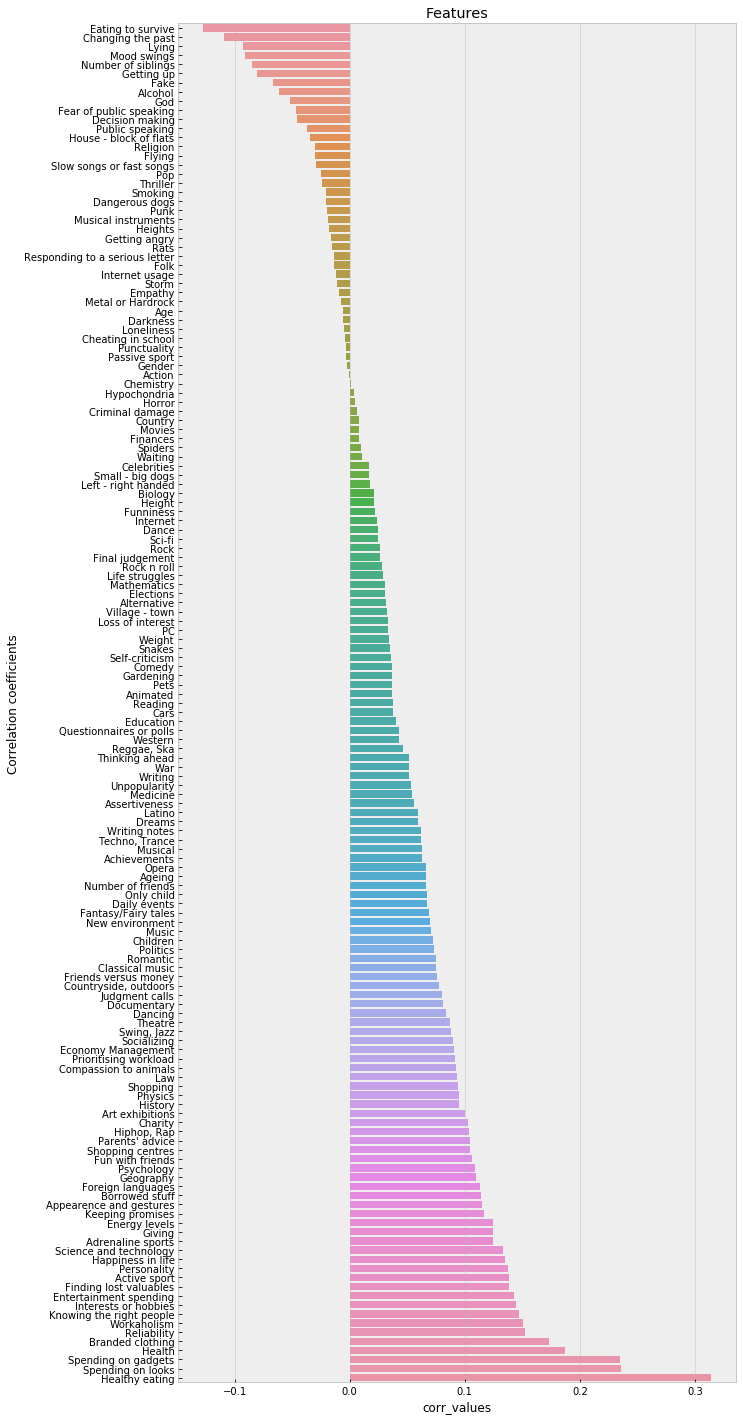

In [18]:
plot_correlation(corrs.corr_values, corrs['features'], figsize = (10,25))

### The strongest and weakest correlation with target feature

In [19]:
print("Strongest correlation:")
display(corrs[corrs.corr_values == max(corrs.corr_values)])
print("Weakest correlation:")
display(corrs[corrs.corr_values == min(corrs.corr_values)])

Strongest correlation:


,corr_values,features
75,0.313779,Healthy eating


Weakest correlation:


,corr_values,features
95,-0.127169,Eating to survive


### Top ten positive correlated features

In [20]:
print()
print("Top ten positive correlated features")
print(corrs.tail(10)['features'])


Top ten positive correlated features
136      Entertainment spending
129        Interests or hobbies
119    Knowing the right people
79                  Workaholism
82                  Reliability
135            Branded clothing
101                      Health
138         Spending on gadgets
137           Spending on looks
75               Healthy eating
Name: features, dtype: object


### Top five negative correlated features

In [22]:
print()
print("Top five negative correlated features")
print(corrs.tail(5)['features'])



Top five negative correlated features
135       Branded clothing
101                 Health
138    Spending on gadgets
137      Spending on looks
75          Healthy eating
Name: features, dtype: object


### Get correlated features for the target feature

In [23]:
def get_correlated_features(corrs):
    
    top_pos_corr_features = corrs.tail(8)['features']
    top_neg_corr_features = corrs.head(5)['features']
    top_corelated_features = np.concatenate((top_pos_corr_features.values, top_neg_corr_features.values), axis=0)
    #feature_matrix = topCorrelatedfeatures.as_matrix()

    top_corr_features_list = list(top_corelated_features)
    print("")
    print("Selected top correlated features for feature matrix:")
    print(top_corr_features_list)
    return top_corr_features_list

In [24]:
top_corr_features_list = get_correlated_features(corrs)


Selected top correlated features for feature matrix:
['Knowing the right people', 'Workaholism', 'Reliability', 'Branded clothing', 'Health', 'Spending on gadgets', 'Spending on looks', 'Healthy eating', 'Eating to survive', 'Changing the past', 'Lying', 'Mood swings', 'Number of siblings']


## Machine learning

### Get feature matrix and target labels to train the models

In [25]:
def get_feature_matrix_and_labels(top_corr_features_list):
    
    correlated_yps_data = yps_data[top_corr_features_list].copy()
    rest_all_yps_data = yps_data.drop(columns=[var_of_interest])

    feature_matrix = correlated_yps_data.as_matrix()
    print("feature_matrix shape: ",feature_matrix.shape)
    #print(type(feature_matrix))
    
    labels = list(yps_data[var_of_interest])
    return feature_matrix, labels

In [26]:
feature_matrix, labels = get_feature_matrix_and_labels(top_corr_features_list)

feature_matrix shape:  (1008, 13)


### Split the data for training and testing

In [27]:
def split_data_in_train_test(feature_matrix, labels):
    
    train_vectors, test_vectors, train_labels, test_labels = train_test_split(feature_matrix, labels, test_size=0.15, random_state=0)

    print("")
    print("train_vectors.size(): ",len(train_vectors))
    print("test_vectors.size(): ",len(test_vectors))
    print("train_labels.size(): ",len(train_labels))
    print("test_labels.size(): ",len(test_labels))

    return train_vectors, test_vectors, train_labels, test_labels

In [28]:
train_vectors, test_vectors, train_labels, test_labels = split_data_in_train_test(feature_matrix, labels)


train_vectors.size():  856
test_vectors.size():  152
train_labels.size():  856
test_labels.size():  152


### Try few machine learning classifiers on these data

#### Naive Bayes Classifier

In [29]:
def gaussian_naive_bayes(train_vectors, test_vectors, train_labels, test_labels):
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    
    classifier_gnb_scores = cross_val_score(gnb, train_vectors, train_labels, cv=8)  
    print("")
    print('Gaussian naive bayes cross_val_scores: ', classifier_gnb_scores)
    y_pred = gnb.fit(train_vectors, train_labels)
    y_pred = gnb.predict(test_vectors) 

    gnb_accuracy = accuracy_score(test_labels, y_pred)
    print("")
    print('Gaussian naive bayes accuracy: ', gnb_accuracy)  
    print()
    print(classification_report(test_labels, y_pred))

In [30]:
gaussian_naive_bayes(train_vectors, test_vectors, train_labels, test_labels)  


Gaussian naive bayes cross_val_scores:  [0.34862385 0.4587156  0.36111111 0.26851852 0.39252336 0.35849057
 0.42857143 0.39423077]

Gaussian naive bayes accuracy:  0.4144736842105263

             precision    recall  f1-score   support

        1.0       0.17      0.20      0.18         5
        2.0       0.29      0.18      0.22        22
        3.0       0.42      0.35      0.38        43
        4.0       0.42      0.50      0.46        48
        5.0       0.49      0.56      0.52        34

avg / total       0.41      0.41      0.41       152



#### Support Vector Machine classifiers

#### Also check the cross validation scores

In [31]:
def svc_rbf(train_vectors, test_vectors, train_labels, test_labels):
    
    print("Training and testing on SVC with rbf kernel")
    classifier_rbf = SVC(kernel='rbf', gamma = 0.01)
    
    classifier_rbf_scores = cross_val_score(classifier_rbf, train_vectors, train_labels, cv=8)  
    print("")
    print('SVC RBF kernel cross_val_scores: ', classifier_rbf_scores)
    
    classifier_rbf.fit(train_vectors, train_labels)
    prediction_rbf = classifier_rbf.predict(test_vectors)
    classifier_rbf_accuracy = accuracy_score(test_labels, prediction_rbf)
    print("")
    print('SVC RBF kernel accuracy: ', classifier_rbf_accuracy)
    print()
    print(classification_report(test_labels, prediction_rbf))

In [32]:
svc_rbf(train_vectors, test_vectors, train_labels, test_labels)

Training and testing on SVC with rbf kernel

SVC RBF kernel cross_val_scores:  [0.30275229 0.35779817 0.32407407 0.2962963  0.41121495 0.32075472
 0.38095238 0.38461538]

SVC RBF kernel accuracy:  0.4473684210526316

             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         5
        2.0       0.00      0.00      0.00        22
        3.0       0.49      0.40      0.44        43
        4.0       0.39      0.83      0.53        48
        5.0       0.73      0.32      0.45        34

avg / total       0.43      0.45      0.39       152



In [33]:
def linear_svm(train_vectors, test_vectors, train_labels, test_labels):
    
    classifier_liblinear = LinearSVC()
    
    classifier_liblinear_scores = cross_val_score(classifier_liblinear, train_vectors, train_labels, cv=8) 
    print("")
    print('Linear SVC cross_val_scores: ', classifier_liblinear_scores)
    
    classifier_liblinear.fit(train_vectors, train_labels)
    prediction_liblinear = classifier_liblinear.predict(test_vectors)

    classifier_liblinear_accuracy = accuracy_score(test_labels, prediction_liblinear)
    print("")
    print('Linear SVC accuracy: ', classifier_liblinear_accuracy)
    print()
    print(classification_report(test_labels, prediction_liblinear))

In [34]:
linear_svm(train_vectors, test_vectors, train_labels, test_labels)


Linear SVC cross_val_scores:  [0.26605505 0.37614679 0.31481481 0.24074074 0.40186916 0.26415094
 0.42857143 0.36538462]

Linear SVC accuracy:  0.4276315789473684

             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         5
        2.0       0.22      0.09      0.13        22
        3.0       0.48      0.35      0.41        43
        4.0       0.38      0.65      0.48        48
        5.0       0.55      0.50      0.52        34

avg / total       0.41      0.43      0.40       152



#### Random Forest Classifier

In [35]:
def rfc(train_vectors, test_vectors, train_labels, test_labels):
    
    from sklearn.ensemble import RandomForestClassifier as RFR

    rfr = RFR()

    rfr_scores = cross_val_score(rfr, train_vectors, train_labels, cv=10) 
    print("")
    print('Random forest classifier crosss_val_scores: ', rfr_scores)

    rfr.fit(train_vectors,train_labels)
    y_pred = rfr.predict(test_vectors) 

    rfr_accuracy = accuracy_score(test_labels, y_pred)
    print("")
    print('Random forest classifier accuracy: ', rfr_accuracy)
    print()
    print(classification_report(test_labels, y_pred))

In [36]:
rfc(train_vectors, test_vectors, train_labels, test_labels)


Random forest classifier crosss_val_scores:  [0.40229885 0.33333333 0.40697674 0.30232558 0.30232558 0.3372093
 0.32941176 0.4        0.36470588 0.37349398]

Random forest classifier accuracy:  0.3815789473684211

             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         5
        2.0       0.27      0.18      0.22        22
        3.0       0.36      0.40      0.38        43
        4.0       0.38      0.48      0.43        48
        5.0       0.50      0.41      0.45        34

avg / total       0.37      0.38      0.37       152



### Accuracy is very low with all the classifiers. We might have to do some more data pre processing.

#### Check the data size and count of each unique values in the target labels

In [37]:
print("")
print("Data size: ",len(labels))
print("")
l_vals_count = yps_data[var_of_interest].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
print("Count of each unique values in the target labels:")
print(l_vals_count)


Data size:  1008

Count of each unique values in the target labels:
4.0    330
3.0    282
5.0    223
2.0    132
1.0     41
Name: Spending on healthy eating, dtype: int64


#### We can see that the classes are highly imbalanced.
Count of examples of class 1.0 is only 41 wheras count of examples of class 4.0 is 330.
These imbalanced classes could be a problem for Machine learning algorithms.
We can do undersampling or oversampling to fix this issue. Since the data size is small, oversampling can result in better classification.

#### Lets do oversampling of the data to balance all the classes by using SMOTE API from imblearn.over_sampling package.

In [38]:
def resample_data(feature_matrix, labels):
    
    print()
    print("Oversampling the data to balance all the classes")
    from imblearn.over_sampling import SMOTE
    X_resampled, y_resampled = SMOTE().fit_sample(feature_matrix, labels)
    print("")
    print("Data examples classes and their counts:")
    print(sorted(Counter(y_resampled).items()))
    return X_resampled, y_resampled

In [39]:
feature_matrix, labels = resample_data(feature_matrix, labels)


Oversampling the data to balance all the classes

Data examples classes and their counts:
[(1.0, 330), (2.0, 330), (3.0, 330), (4.0, 330), (5.0, 330)]


### Split the data again for resampled data for training and testing

In [40]:
train_vectors, test_vectors, train_labels, test_labels = split_data_in_train_test(feature_matrix, labels)


train_vectors.size():  1402
test_vectors.size():  248
train_labels.size():  1402
test_labels.size():  248


### Now run the classifiers again with resampled train and test data 

In [45]:
print("Running gaussian_naive_bayes after oversampling the data")
gaussian_naive_bayes(train_vectors, test_vectors, train_labels, test_labels)

Running gaussian_naive_bayes after oversampling the data

Gaussian naive bayes cross_val_scores:  [0.47752809 0.43502825 0.52272727 0.47159091 0.47701149 0.45402299
 0.43103448 0.40462428]

Gaussian naive bayes accuracy:  0.4717741935483871

             precision    recall  f1-score   support

        1.0       0.62      0.84      0.72        51
        2.0       0.36      0.41      0.38        46
        3.0       0.37      0.31      0.33        49
        4.0       0.39      0.29      0.33        48
        5.0       0.53      0.48      0.50        54

avg / total       0.46      0.47      0.46       248



In [46]:
print("Running svc_rbf after oversampling the data")
svc_rbf(train_vectors, test_vectors, train_labels, test_labels)

Running svc_rbf after oversampling the data
Training and testing on SVC with rbf kernel

SVC RBF kernel cross_val_scores:  [0.47191011 0.38983051 0.51136364 0.46590909 0.51149425 0.4137931
 0.44827586 0.39306358]

SVC RBF kernel accuracy:  0.4798387096774194

             precision    recall  f1-score   support

        1.0       0.61      0.94      0.74        51
        2.0       0.44      0.41      0.43        46
        3.0       0.31      0.20      0.25        49
        4.0       0.35      0.35      0.35        48
        5.0       0.56      0.46      0.51        54

avg / total       0.46      0.48      0.46       248



In [47]:
linear_svm(train_vectors, test_vectors, train_labels, test_labels)


Linear SVC cross_val_scores:  [0.38764045 0.38983051 0.47727273 0.41477273 0.43678161 0.3908046
 0.37931034 0.40462428]

Linear SVC accuracy:  0.39919354838709675

             precision    recall  f1-score   support

        1.0       0.46      0.88      0.61        51
        2.0       0.26      0.20      0.22        46
        3.0       0.25      0.06      0.10        49
        4.0       0.36      0.27      0.31        48
        5.0       0.43      0.54      0.48        54

avg / total       0.36      0.40      0.35       248



In [48]:
rfc(train_vectors, test_vectors, train_labels, test_labels)


Random forest classifier crosss_val_scores:  [0.55244755 0.56338028 0.63829787 0.60992908 0.6        0.57142857
 0.61151079 0.55395683 0.63309353 0.5942029 ]

Random forest classifier accuracy:  0.6088709677419355

             precision    recall  f1-score   support

        1.0       0.77      0.94      0.85        51
        2.0       0.65      0.76      0.70        46
        3.0       0.46      0.45      0.45        49
        4.0       0.40      0.33      0.36        48
        5.0       0.68      0.56      0.61        54

avg / total       0.60      0.61      0.60       248



### We can see that we have achieved far better accuracy than earlier after oversampling the data

### Now lets try to tune the parameters for better accuracy

In [49]:
def find_best_svc_params():

    # Set the parameters by cross-validation
    tuning_params = [{'kernel': ['rbf'], 'gamma': [ 'auto', 1e-3, 1e-4],
                         'C': [1, 100, 500]},
                        {'kernel': ['linear'], 'C': [1, 100, 500]}]
    
    print("Tuning hyper-parameters for SVC")
    print()
    clf = GridSearchCV(SVC(), tuning_params, cv=5)
    clf.fit(train_vectors, train_labels)

    print("Best hyper-parameters found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Cross validation scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    return clf.best_params_

In [50]:
svc_best_params = find_best_svc_params()

Tuning hyper-parameters for SVC

Best hyper-parameters found on development set:

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}

Cross validation scores on development set:

0.581 (+/-0.041) for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.410 (+/-0.061) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.203 (+/-0.002) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.644 (+/-0.049) for {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
0.447 (+/-0.065) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.419 (+/-0.089) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.644 (+/-0.049) for {'C': 500, 'gamma': 'auto', 'kernel': 'rbf'}
0.502 (+/-0.062) for {'C': 500, 'gamma': 0.001, 'kernel': 'rbf'}
0.421 (+/-0.067) for {'C': 500, 'gamma': 0.0001, 'kernel': 'rbf'}
0.421 (+/-0.074) for {'C': 1, 'kernel': 'linear'}
0.419 (+/-0.068) for {'C': 100, 'kernel': 'linear'}
0.422 (+/-0.058) for {'C': 500, 'kernel': 'linear'}


In [51]:
def plot_validation_curve(estimator, X, y, title):

    from sklearn.model_selection import validation_curve

    param_range = np.logspace(-6, -1, 5)
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name="gamma", param_range=param_range,
        cv=10, scoring="accuracy", n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel("$\gamma$")
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

In [66]:
def svc_best_params_classifier(train_vectors, test_vectors, train_labels, test_labels, best_params):
    
    if not best_params:
        classifier_svc = svm.SVC(kernel='rbf')
    else:
        kernel = best_params.get('kernel')
        if not best_params.get('gamma'):
            gamma = 'auto'
        else:
            gamma = best_params.get('gamma')
        C = best_params.get('C')
        classifier_svc = SVC(kernel=kernel, gamma = gamma, C = C)
        
    print()
    print("Best params used in SVC classifier for final classification:")
    print("kernel: ",kernel)
    print("gamma: ",gamma)
    print("C: ",C)
    
    title = "Validation Curves with (SVM, RBF kernel)"
    
    plot_validation_curve(classifier_svc, train_vectors, train_labels, title) 
    
    classifier_svc.fit(train_vectors, train_labels)
    y_pred = classifier_svc.predict(test_vectors)
    
    misclassified = np.where(np.asarray(test_labels) != y_pred)
    print()
    print("Misclassified examples indices in test vector:",misclassified)
    classifier_svc_accuracy = accuracy_score(test_labels, y_pred)
    
    print("")
    print('SVC RBF kernel accuracy: ', classifier_svc_accuracy)
    print()
    print(classification_report(test_labels, y_pred))
    

Training and testing on SVC with best params found from cross validation

Best params used in SVC classifier for final classification:
kernel:  rbf
gamma:  auto
C:  100


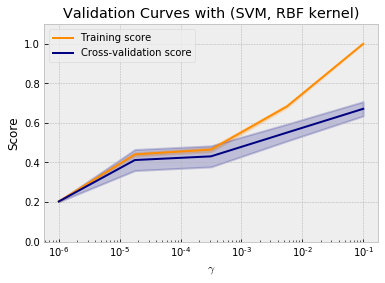


Misclassified examples indices in test vector: (array([  0,   6,   8,  14,  16,  23,  25,  29,  32,  39,  41,  44,  45,
        46,  47,  57,  65,  66,  71,  76,  77,  78,  81,  84,  85,  89,
        90,  94,  99, 103, 104, 116, 118, 122, 123, 124, 129, 130, 131,
       136, 139, 141, 147, 148, 151, 154, 156, 157, 161, 163, 164, 168,
       175, 176, 180, 184, 190, 193, 196, 200, 202, 206, 214, 216, 227,
       229, 236, 237, 238, 240, 242], dtype=int64),)

SVC RBF kernel accuracy:  0.7137096774193549

             precision    recall  f1-score   support

        1.0       0.89      0.98      0.93        51
        2.0       0.70      0.93      0.80        46
        3.0       0.62      0.61      0.62        49
        4.0       0.52      0.33      0.41        48
        5.0       0.73      0.70      0.72        54

avg / total       0.70      0.71      0.70       248



In [67]:
print("Training and testing on SVC with best params found from cross validation")
svc_best_params_classifier(train_vectors, test_vectors, train_labels, test_labels, svc_best_params)

In [56]:
def find_best_rfc_params():

    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(random_state=0)

    param_grid = { 
    'n_estimators': [10, 500, 700]}
    
    print("Tuning hyper-parameters")
    print()
    clf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 8)
    clf.fit(train_vectors, train_labels)

    print("Best hyper-parameters found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Cross validation scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    return clf.best_params_

In [57]:
rfc_best_params = find_best_rfc_params()

Tuning hyper-parameters

Best hyper-parameters found on development set:

{'n_estimators': 500}

Cross validation scores on development set:

0.577 (+/-0.041) for {'n_estimators': 10}
0.633 (+/-0.057) for {'n_estimators': 500}
0.631 (+/-0.059) for {'n_estimators': 700}


In [64]:
def rfc_classifier(train_vectors, test_vectors, train_labels, test_labels, best_params):
    
    print()
    if not best_params or len(best_params) == 0:
        print("No best params. Using default params.")
        rfr = RFR(n_estimators=500,random_state=0)
    else:
        n_estimators=best_params.get('n_estimators')
        print("Best params found for Random forest classifier - n_estimators: ",n_estimators)
        rfr = RFR(n_estimators = n_estimators, random_state=0)

    rfr.fit(train_vectors,train_labels)
    
    y_pred = rfr.predict(test_vectors) 

    misclassified = np.where(np.asarray(test_labels) != y_pred)
    print()
    print("Misclassified examples indices in test vector:",misclassified)
    
    rfr_accuracy = accuracy_score(test_labels, y_pred)
    print("")
    print('Random forest classifier accuracy after parameter tuning: ', rfr_accuracy)
    print()
    print(classification_report(test_labels, y_pred))
    print()

In [65]:
print("Training and testing Random forest classifier with best params found from cross validation")
rfc_classifier(train_vectors, test_vectors, train_labels, test_labels, rfc_best_params)

Training and testing Random forest classifier with best params found from cross validation

Best params found for Random forest classifier - n_estimators:  500

Misclassified examples indices in test vector: (array([  0,   8,   9,  14,  19,  23,  25,  38,  44,  46,  47,  57,  66,
        67,  76,  78,  81,  84,  85,  89,  90,  94,  96,  99, 102, 103,
       115, 116, 118, 121, 123, 124, 128, 129, 130, 131, 133, 136, 139,
       140, 141, 147, 148, 151, 156, 157, 161, 163, 164, 168, 175, 178,
       180, 184, 185, 190, 194, 195, 196, 200, 202, 212, 214, 216, 227,
       228, 229, 236, 237, 238, 239, 240], dtype=int64),)

Random forest classifier accuracy after parameter tuning:  0.7096774193548387

             precision    recall  f1-score   support

        1.0       0.88      0.98      0.93        51
        2.0       0.78      0.87      0.82        46
        3.0       0.55      0.53      0.54        49
        4.0       0.49      0.40      0.44        48
        5.0       0.76     